In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [2]:
bathroom_designs = tf.keras.utils.image_dataset_from_directory('home-styles/Bath/interior-designs', batch_size=64, label_mode='categorical')

Found 48800 files belonging to 19 classes.


In [3]:
bathroom_class_names = bathroom_designs.class_names
for i, class_name in enumerate(bathroom_class_names):
    print(f"Class name: {class_name}, Integer label: {i}")

Class name: Asian, Integer label: 0
Class name: Coastal, Integer label: 1
Class name: Contemporary, Integer label: 2
Class name: Craftsman, Integer label: 3
Class name: Eclectic, Integer label: 4
Class name: Farmhouse, Integer label: 5
Class name: French-Country, Integer label: 6
Class name: Industrial, Integer label: 7
Class name: Mediterranean, Integer label: 8
Class name: Mid-Century-Modern, Integer label: 9
Class name: Modern, Integer label: 10
Class name: Rustic, Integer label: 11
Class name: Scandinavian, Integer label: 12
Class name: Shabby-Chic, Integer label: 13
Class name: Southwestern, Integer label: 14
Class name: Traditional, Integer label: 15
Class name: Transitional, Integer label: 16
Class name: Tropical, Integer label: 17
Class name: Victorian, Integer label: 18


In [4]:
import numpy as np

data_iterator = bathroom_designs.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

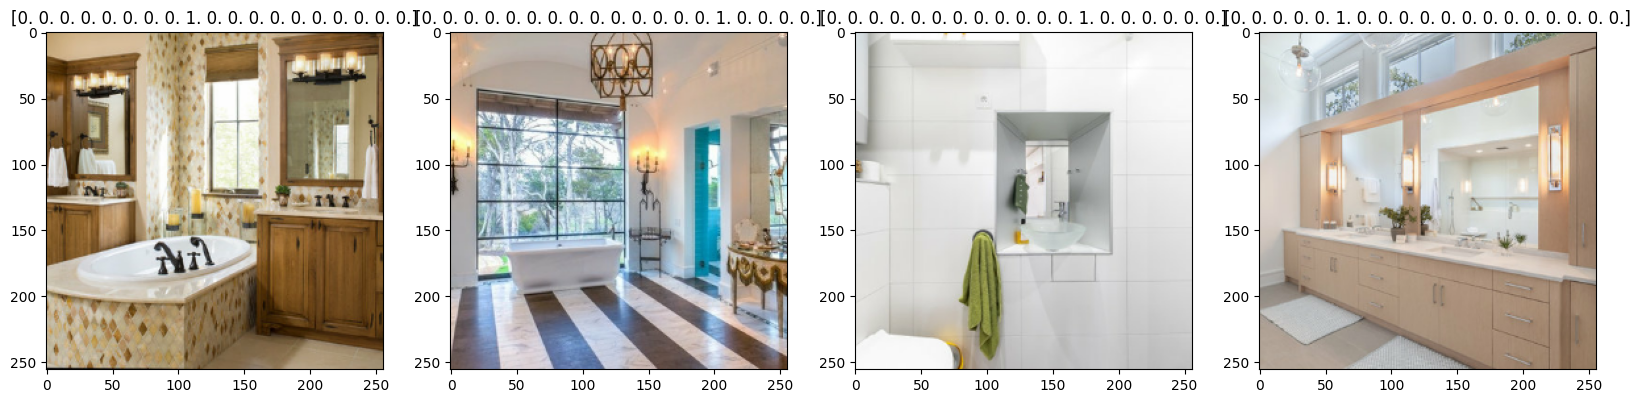

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
#Normalization of the images
kitchen_designs = bathroom_designs.map(lambda x, y: (x / 255.0, y))

In [8]:
train_size = int(len(bathroom_designs)*.8)
val_size = int(len(bathroom_designs)*.2)

train = bathroom_designs.take(train_size)
val = bathroom_designs.skip(train_size).take(val_size)

In [9]:
def image_augmentation(image, label):
    #image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_hue(image, 0.2)
    image = tf.image.random_saturation(image, 0.5, 1.0)
    return image, label

In [10]:
augmented_train = train.map(image_augmentation)

In [11]:
def plot_history(history):
    # Figure Configuration to show two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    # Plot one to visualize the loss from the history
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.grid(True)
    ax1.legend(['Loss', 'Val_Loss'])
    # Plot two to visualize the accuracy from the history
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    ax2.legend(['Accuracy', 'Val_Accuracy'])
    plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
def train_model(filter_1, filter_2, filter_3, kernel, num_of_epochs, training_dataset, validation_dataset):
    model = Sequential()
    model.add(Conv2D(filter_1, (kernel,kernel), 1, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(filter_2, (kernel,kernel), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filter_3, (kernel,kernel), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(19, activation='softmax'))
    model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
    model.summary()
    logdir = 'logs'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    history = model.fit(training_dataset, epochs=num_of_epochs, validation_data=validation_dataset, callbacks=[tensorboard_callback])
    return model, history

In [17]:
model, history = train_model(16, 32, 32, 3, 10, augmented_train, val)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     7,373,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 19)             │         4,883 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,275 (28.20 MB)

 Trainable params: 7,392,275 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 146s 229ms/step - accuracy: 0.0764 - loss: 2.7976 - val_accuracy: 0.1033 - val_loss: 0.2148
Epoch 2/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 124s 202ms/step - accuracy: 0.0977 - loss: 0.2108 - val_accuracy: 0.1053 - val_loss: 0.2112
Epoch 3/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 123s 202ms/step - accuracy: 0.1217 - loss: 0.1992 - val_accuracy: 0.0813 - val_loss: 0.1980
Epoch 4/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 124s 203ms/step - accuracy: 0.1223 - loss: 0.1944 - val_accuracy: 0.1034 - val_loss: 0.2009
Epoch 5/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 124s 202ms/step - accuracy: 0.1510 - loss: 0.1900 - val_accuracy: 0.1167 - val_loss: 0.1972
Epoch 6/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 123s 201ms/step - accuracy: 0.1763 - loss: 0.1858 - val_accuracy: 0.1083 - val_loss: 0.2030
Epoch 7/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 123s 200ms/step - accuracy: 0.1984 - loss: 0.1820 - val_accuracy: 0.1109 - val_loss: 0.2035
Epoch 8/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 123s 201ms/step - accuracy: 0.2173 -

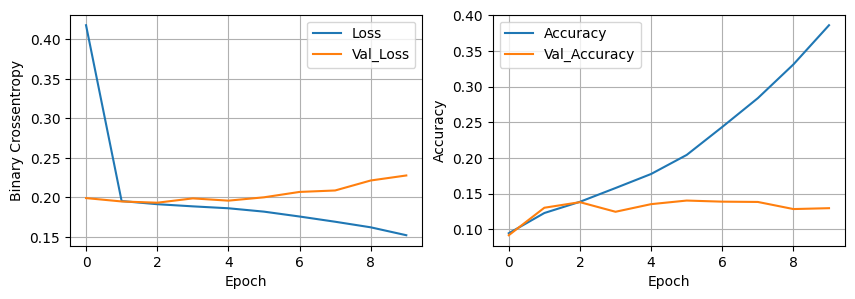

In [14]:
plot_history(history)

In [15]:
model.save('house-styles-models/bathroom-style-classification-model.keras')